In [1]:
from data_builder import *
from models import *
from utils import *
from tensorboardX import SummaryWriter
import argparse
import pandas as pd
import tensorflow as tf
import seaborn as sns

/Users/shaan/anaconda3/envs/main/lib/python3.7/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=3, rc={'lines.linewidth':3})
sns.set_palette('deep')


In [3]:
from scipy.stats import gmean,gstd


In [4]:
root_dir = 'expt_22_june'
dataset_name = 'mass_spring'
state_error = np.load(f'{root_dir}/{dataset_name}_state_error_noisy.npy')

In [5]:
state_error.shape

(2, 6, 50)

In [6]:
def convert_to_df(state_error):
    df = pd.DataFrame(columns=['Method','Error','Integrator'])
    label_list = ['DN','HNN','PNN','DGN','HOGN','PGN']
    integs = ['rk4','vi4']
    for i in range(6):
        for j in range(2):
            for test_pt in range(50):
                df.loc[len(df)] = [label_list[i],state_error[j,i,test_pt],integs[j]]

    return df

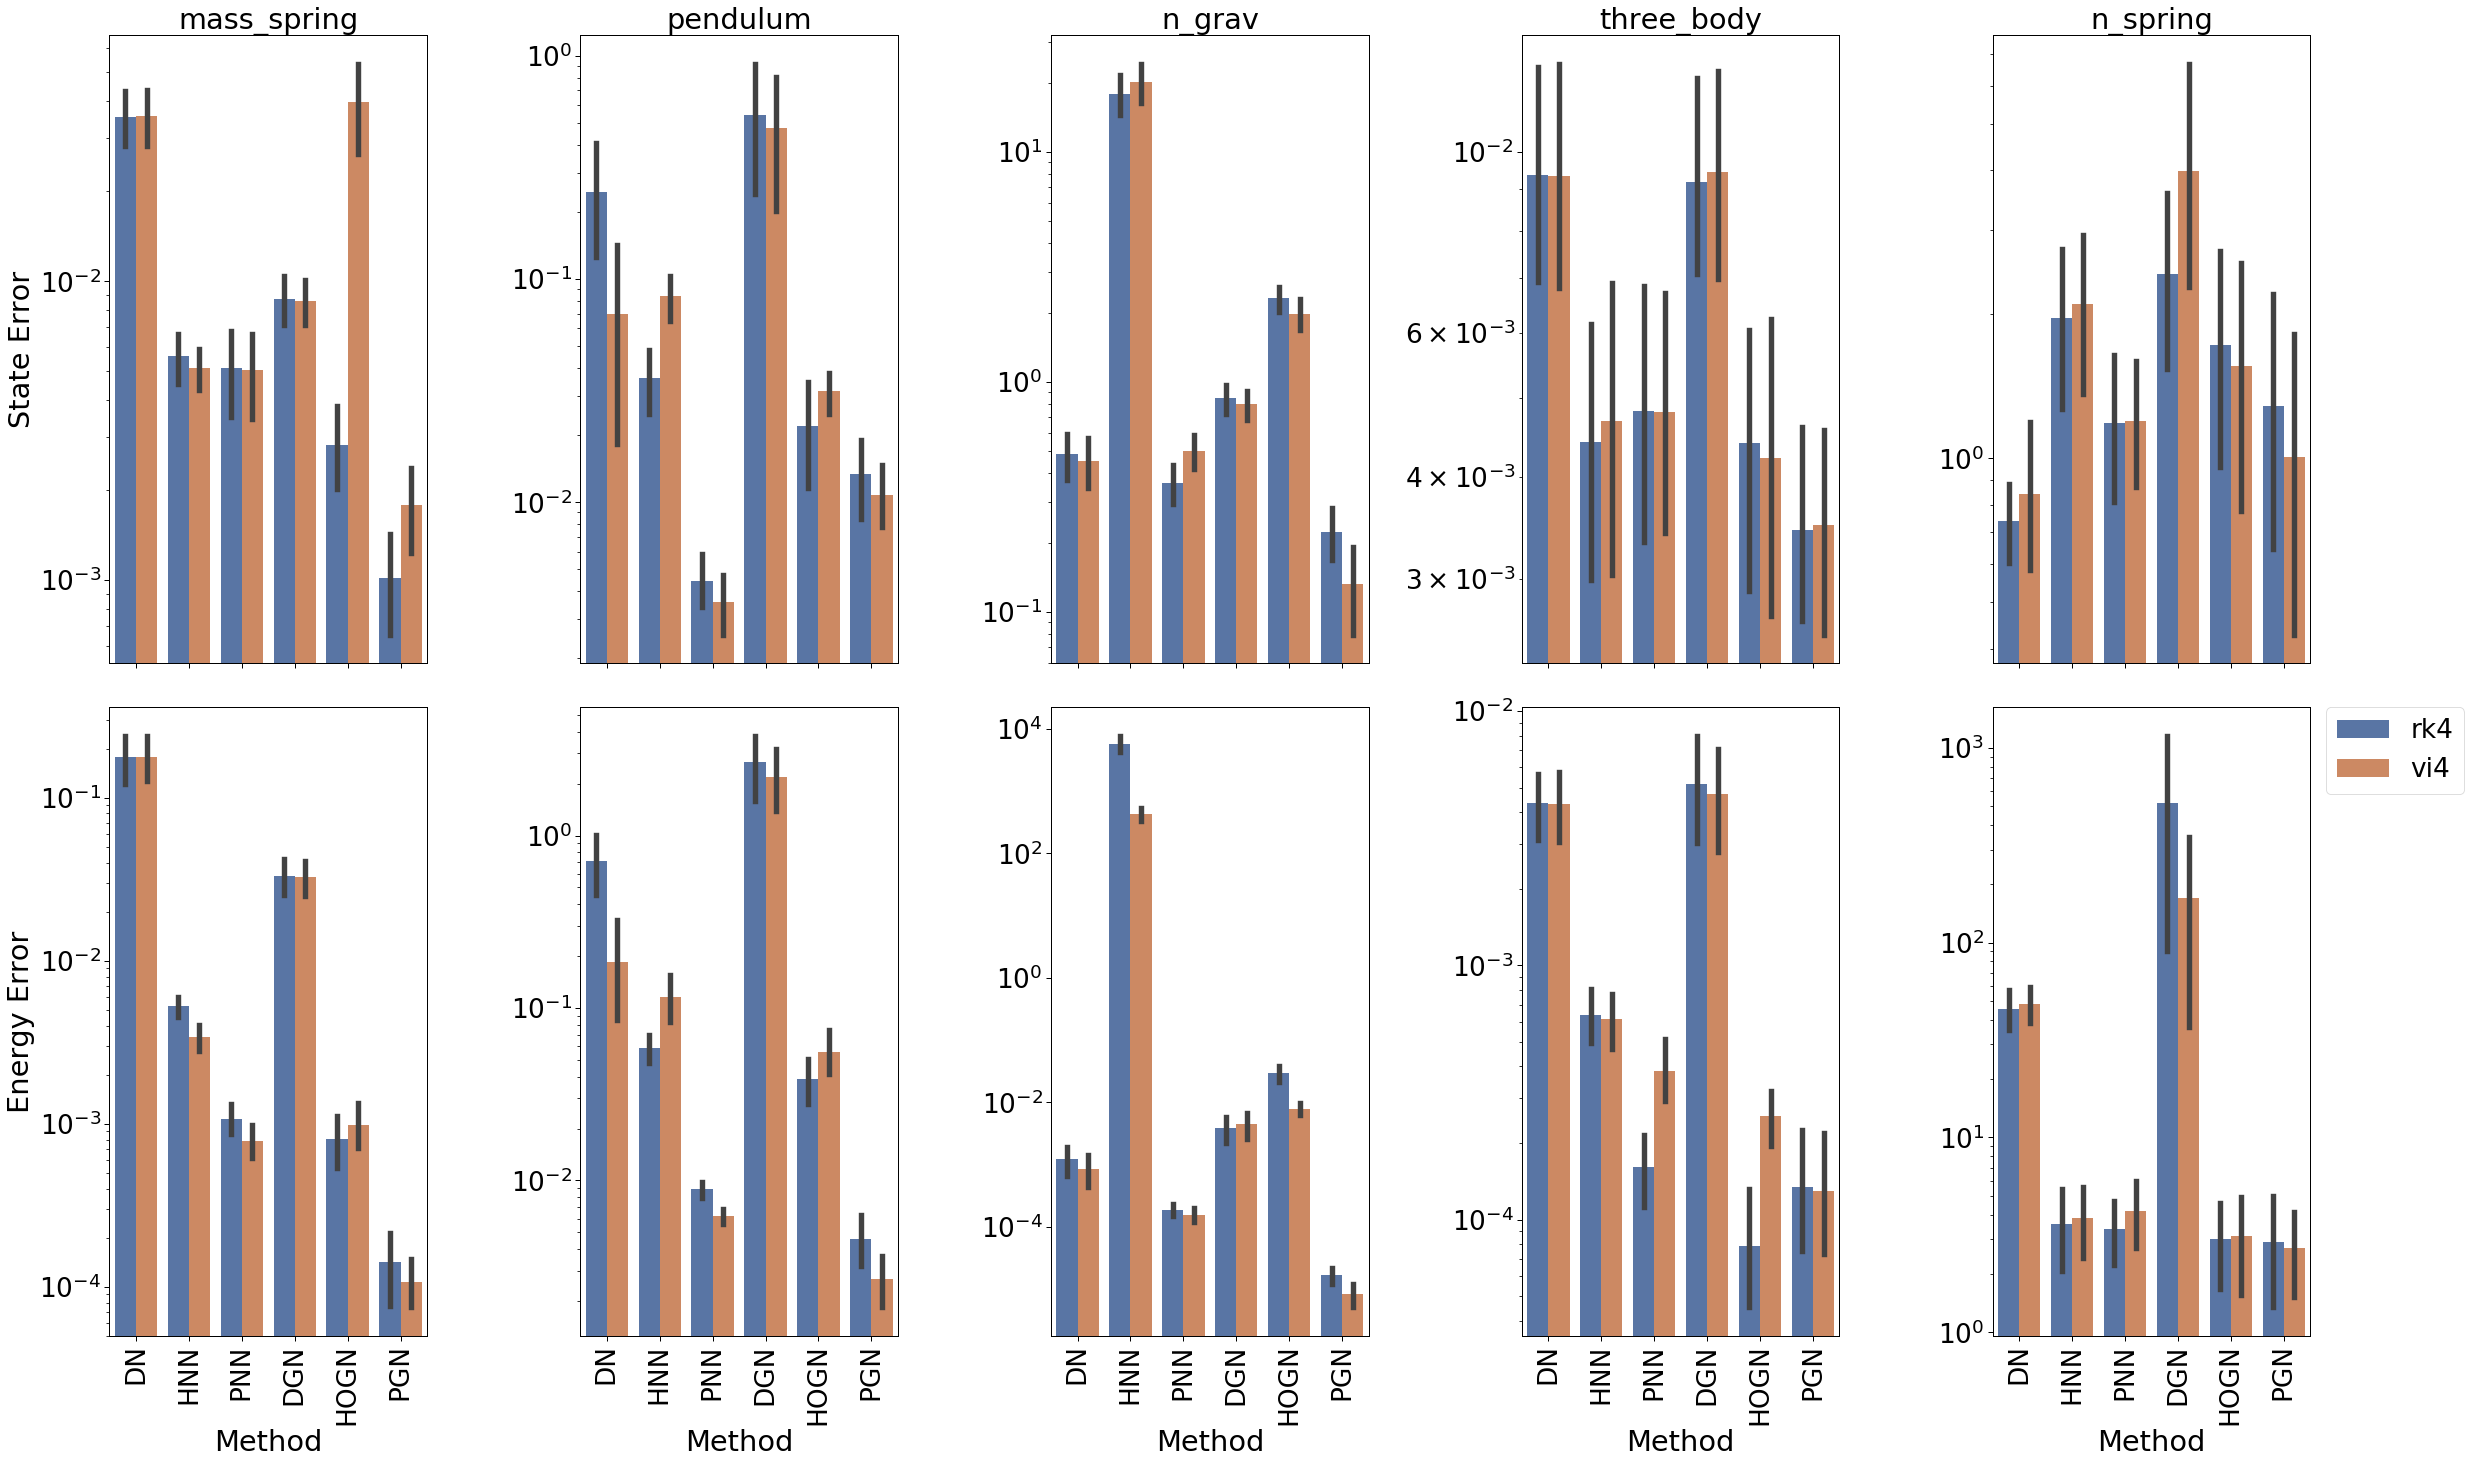

In [7]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=3, rc={'lines.linewidth':3})
sns.set_palette('deep')

# fig,ax = plt.subplots(1,2,figsize=(20,7))

# g = sns.barplot(x='Method',y='State Error',data=new_df,ax=ax[0])
# g.set_yscale('log')

# g = sns.barplot(x='Method',y='Energy Error',data=new_df,ax=ax[1])
# g.set_yscale('log')

# ax[1].set_ylabel('Average Energy MSE')
# ax[0].set_ylabel('Average State MSE')


noise_vec = [True]
datasets = ['mass_spring','pendulum','n_grav','three_body','n_spring']
root_dir = 'expt_22_june'
# root_dir = ''
label_list = ['DN','HNN','PNN','DGN','HOGN','PGN']
labels = ['MASS SPRING','PENDULUM','2-BODY GRAVITATIONAL','3-BODY GRAVITATIONAL','5 SPRING PARTICLE','HEINON HEILES']

fig,ax = plt.subplots(2,5,figsize=(7*5,7*3),sharex=True)
# fig.suptitle(labels[data_index])
ax[0,0].set_ylabel('State MSE')
ax[1,0].set_ylabel('Energy MSE')

for data_index,dataset_name in enumerate(datasets):
    for noisy in noise_vec:
        if noisy:
            state_error = np.load(f'{root_dir}/{dataset_name}_state_error_noisy.npy')
            energy_error = np.load(f'{root_dir}/{dataset_name}_energy_error_noisy.npy')
        else:
            state_error = np.load(f'{dataset_name}_state_error.npy')
            energy_error = np.load(f'{dataset_name}_energy_error.npy')
        
        states_df = convert_to_df(state_error)
        energy_df = convert_to_df(energy_error)
        
        ax[0,data_index].set_title(dataset_name)
        g = sns.barplot(x='Method',y='Error',hue='Integrator',data=states_df,ax=ax[0,data_index])
        g.set_yscale('log')
        g.set(xlabel=None)
        if data_index >0:
            g.set(ylabel=None)
            g.legend([],[], frameon=False)
        else:
            g.set(ylabel='State Error')
            g.legend([],[], frameon=False)
#         g.set_xticks(rotation=45)
        g = sns.barplot(x='Method',y='Error',hue='Integrator',data=energy_df,ax=ax[1,data_index])
        g.set_yscale('log')
        if data_index >0:
            g.set(ylabel=None)
            g.legend([],[], frameon=False)
        else:
            g.set(ylabel='Energy Error')
            g.legend([],[], frameon=False)
#         locs, labels = plt.xticks()
#         plt.setp(labels, rotation=45)
        
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
#         plt.xticks(rotation=45)

#         ax[0,data_index].errorbar(xvals-0.23,np.mean(state_error[0,:,:],1),yerr=np.std(state_error[0,:,:],1),fmt='o',label='rk4',color='royalblue',alpha=1)
#         ax[0,data_index].errorbar(xvals+0.23,np.mean(state_error[1,:,:],1),yerr=np.std(state_error[1,:,:],1),fmt='o',label='vi4',color='darkorange',alpha=1)
#         ax[1,data_index].errorbar(xvals-0.23,np.mean(energy_error[0,:,:],1),yerr=np.std(energy_error[0,:,:],1),fmt='o',label='rk4',color='royalblue',alpha=1)
#         ax[1,data_index].errorbar(xvals+0.23,np.mean(energy_error[1,:,:],1),yerr=np.std(energy_error[1,:,:],1),fmt='o',label='vi4',color='darkorange',alpha=1)
#         ax[0,data_index].set_yscale('log',nonposy='clip')
#         ax[1,data_index].set_yscale('log',nonposy='clip')
#         ax[1].set_yscale('log',nonposy='clip')
#         ax[0].set_ylim([-10**9,0])
#         ax[1].set_ylim([-10**9,0])
        
#         ax[1,data_index].set_xticks(xvals)
#         ax[1,data_index].set_xticklabels(label_list)
#         plt.show()
#         plt.tight_layout()
#         plt.savefig(f'{dataset_name}_geom_tanh_{noisy}.pdf',bbox_inches='tight')

In [8]:
10**(-2)/np.log(10)

0.004342944819032518

In [23]:
-10**9

-1000000000

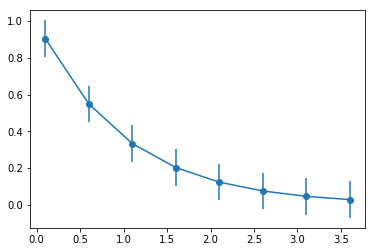

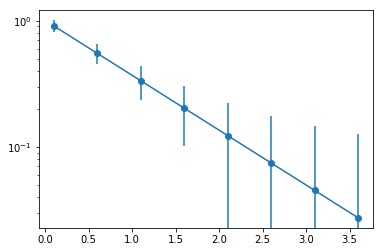

In [44]:
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
error = 0.1 #+ 0.2 * x
plt.figure()
plt.errorbar(x, y, yerr=error, fmt='-o')
plt.figure()
plt.errorbar(x, y, yerr=error, fmt='-o')
plt.yscale('log')



In [7]:
from data_builder import *
from models import *
from utils import *
from tensorboardX import SummaryWriter
import argparse
import pickle
import pandas as pd
import tensorflow as tf
from utils import get_hamiltonian
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
noise_vec = [True]
datasets = ['mass_spring','pendulum','n_grav','three_body','n_spring','heinon']
dimz = [1,1,4,6,10,2]
root_dir = 'largest_expt/'

state_error = np.zeros((6,2,6,50))
energy_error = np.zeros((6,2,6,50))

for dex_data,dataset_name in enumerate(datasets):
    hamiltonian_fn = get_hamiltonian(dataset_name)
    for noisy in noise_vec:
        if noisy:
            with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        else:
            with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        lab_list = ['dn','hnn','pnn','dgn','hogn','pgn']
#         fig,axs = plt.subplots(1,4,figsize=(20,5))
#         ax = axs.ravel()
        #ax = axs.ravel()
        for TEST_POINT in range(50):
            for dex in range(len(lab_list)):
                for integ_index,integ_type in enumerate(['rk4','vi4']):
                    true_batch_tmp = file[f'gt_{TEST_POINT}']
                    qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                    ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                    true_batch = np.concatenate([qs,ps],1)

                    if 'g' not in lab_list[dex]:
                        yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                        K_pred,U_pred = hamiltonian_fn(yhat,'classic')
                    else:
                        yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                        qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                        ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                        yhat = np.concatenate([qs,ps],1)
                        K_pred,U_pred = hamiltonian_fn(yhat,'classic')

                    K_true,U_true = hamiltonian_fn(true_batch,'classic')

                    ham_pred = K_pred + U_pred
                    ham_true = K_true + U_true
                    yhat = yhat[:int(yhat.shape[0]/3)]
                    true_batch = true_batch[:int(true_batch.shape[0]/3)]
                    ham_pred = ham_pred[:int(ham_pred.shape[0]/3)]
                    ham_true = ham_true[:int(ham_true.shape[0]/3)]
#                     print(yhat.shape,yhat.ravel().shape)
                    state_mse = ((yhat-true_batch)**2).mean()
                    energy_mse = ((ham_pred-ham_true)**2).mean()
#                     print(state_mse,energy_mse)
                    state_error[dex_data,integ_index,dex,TEST_POINT] = state_mse
                    energy_error[dex_data,integ_index,dex,TEST_POINT] = energy_mse


In [17]:
datasets

['mass_spring', 'pendulum', 'n_grav', 'three_body', 'n_spring', 'heinon']

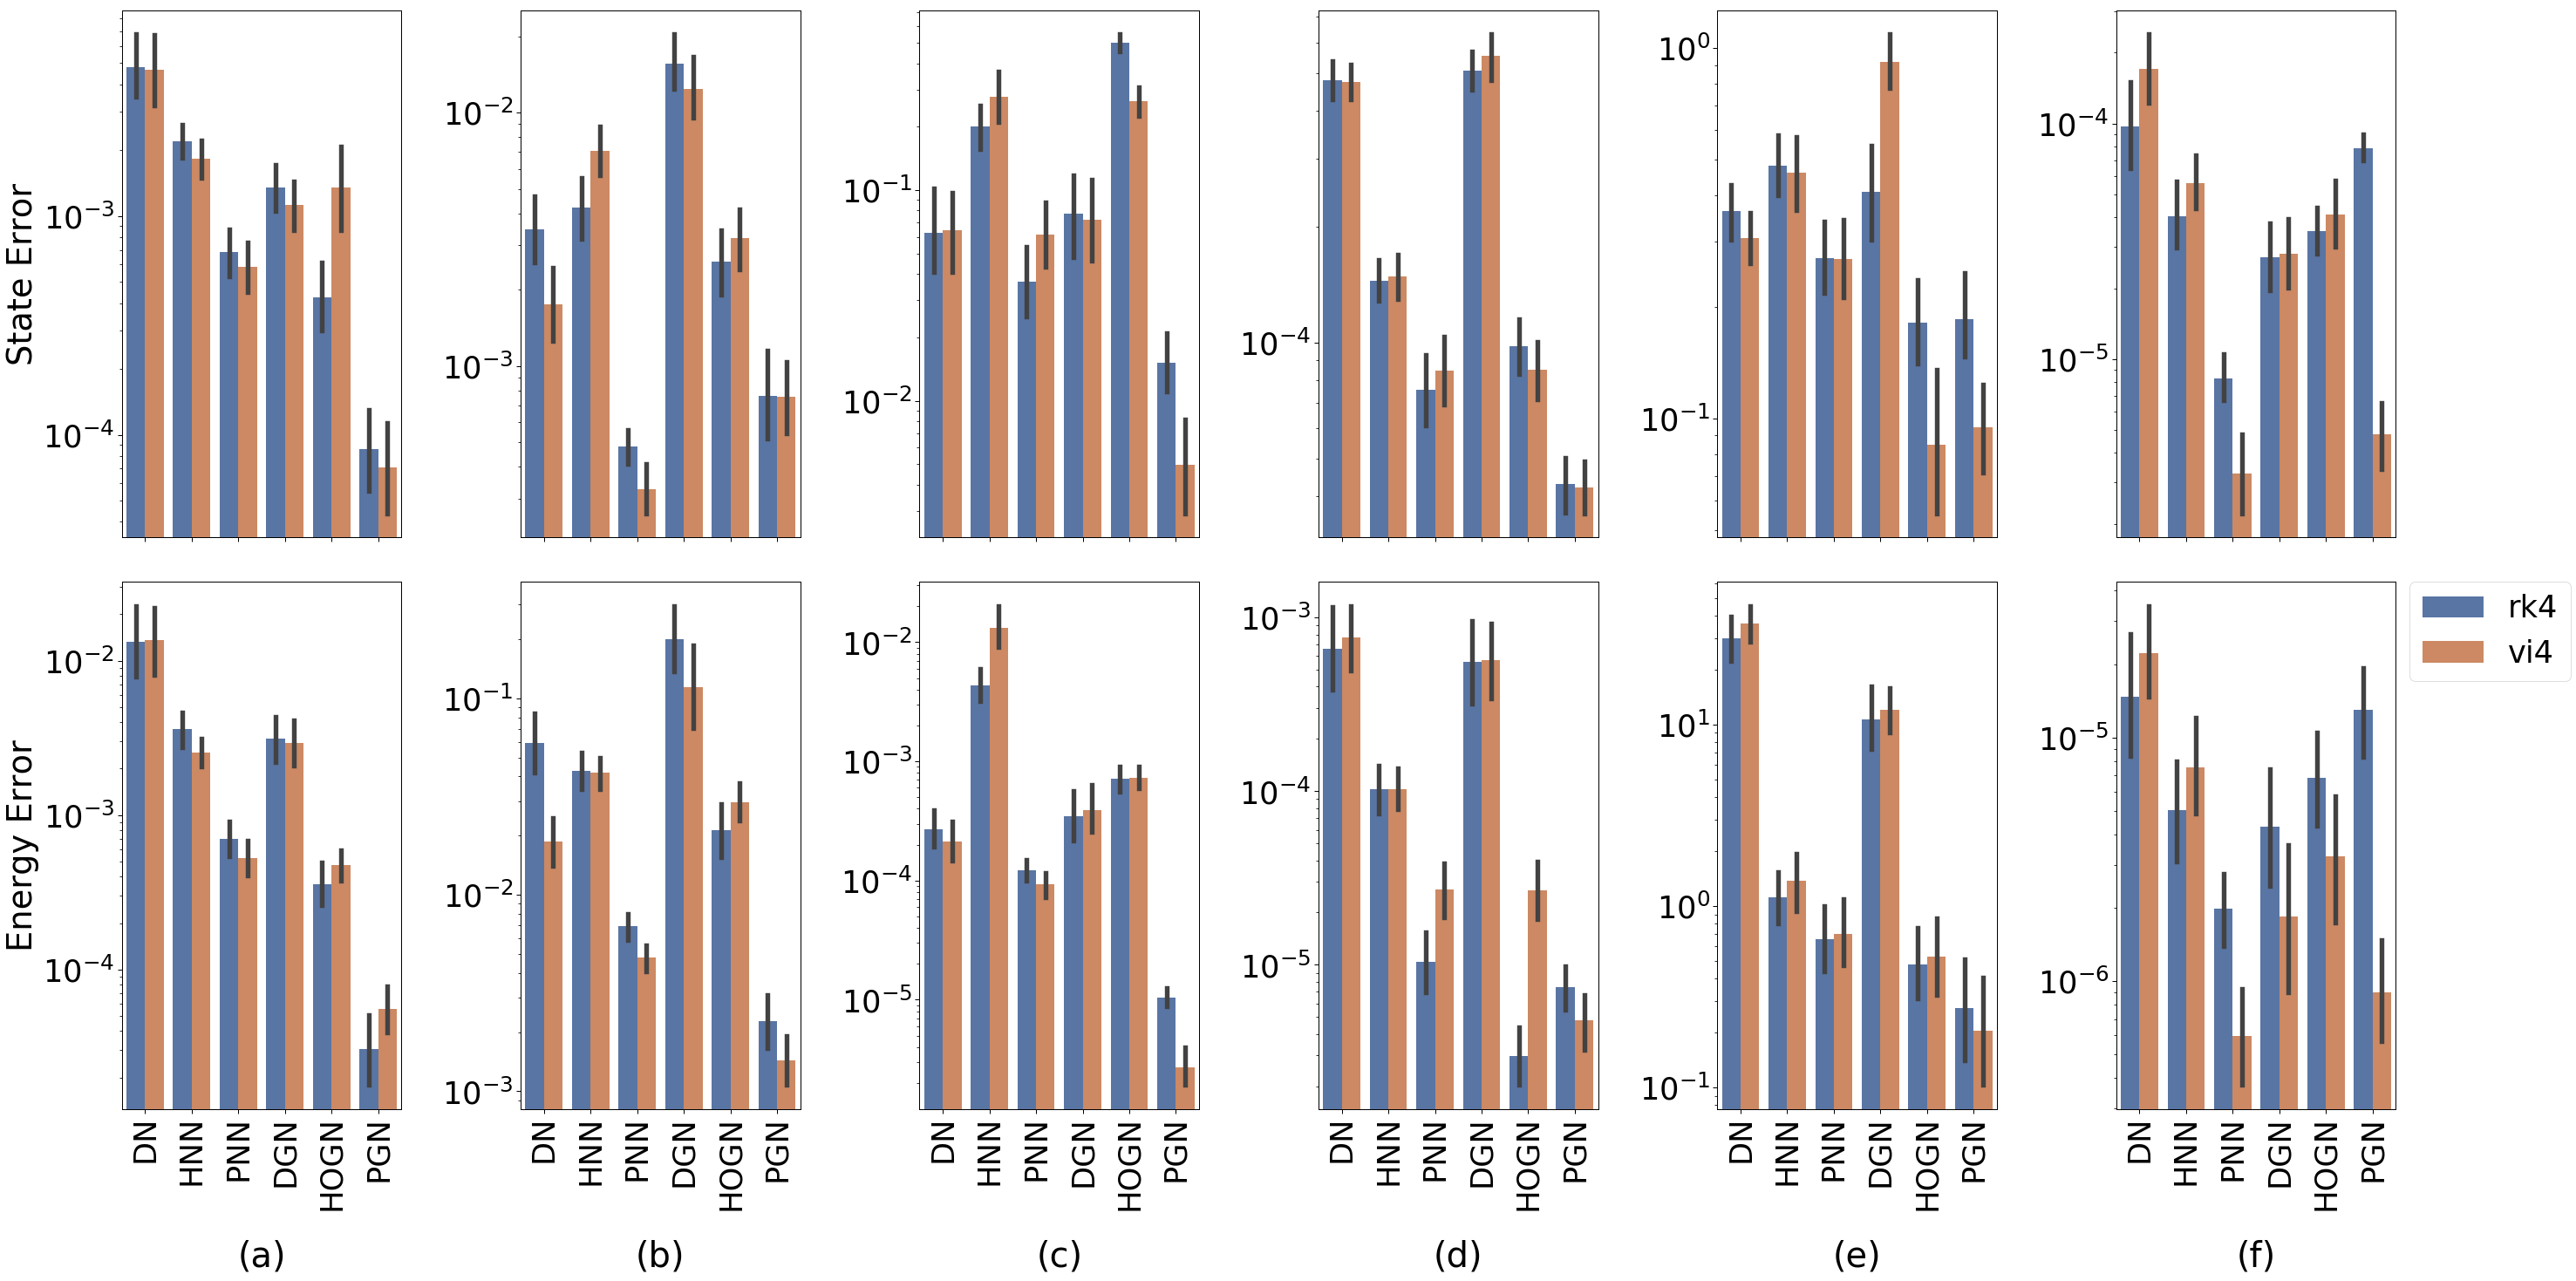

In [19]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=4, rc={'lines.linewidth':3})
sns.set_palette('deep')

# fig,ax = plt.subplots(1,2,figsize=(20,7))

# g = sns.barplot(x='Method',y='State Error',data=new_df,ax=ax[0])
# g.set_yscale('log')

# g = sns.barplot(x='Method',y='Energy Error',data=new_df,ax=ax[1])
# g.set_yscale('log')

# ax[1].set_ylabel('Average Energy MSE')
# ax[0].set_ylabel('Average State MSE')


noise_vec = [True]
datasets = ['mass_spring','pendulum','n_grav','three_body','n_spring','heinon']
root_dir = 'expt_22_june'
# root_dir = ''
label_list = ['DN','HNN','PNN','DGN','HOGN','VIGN']
labels = ['MASS SPRING','PENDULUM','2-BODY GRAVITATIONAL','3-BODY GRAVITATIONAL','5 SPRING PARTICLE','HENON-HEILES']

fig,ax = plt.subplots(2,6,figsize=(7*6,7*3),sharex=True)
# fig.suptitle(labels[data_index])
ax[0,0].set_ylabel('State MSE')
ax[1,0].set_ylabel('Energy MSE')

new_label = ['(a)','(b)','(c)','(d)','(e)','(f)']

for data_index,dataset_name in enumerate(datasets):
    for noisy in noise_vec:
        
        state_error1 = state_error[data_index]
        energy_error1 = energy_error[data_index]

        states_df = convert_to_df(state_error1)
        energy_df = convert_to_df(energy_error1)
        
#         ax[0,data_index].set_title(labels[data_index])
        g = sns.barplot(x='Method',y='Error',hue='Integrator',estimator=gmean,data=states_df,ax=ax[0,data_index])
        g.set_yscale('log')
        g.set(xlabel=None)
        if data_index >0:
            g.set(ylabel=None)
            g.set(xlabel=None)
            g.legend([],[], frameon=False)
        else:
            g.set(ylabel='State Error')
            g.set(xlabel=None)
            g.legend([],[], frameon=False)
#         g.set_xticks(rotation=45)
        g = sns.barplot(x='Method',y='Error',hue='Integrator',estimator=gmean,data=energy_df,ax=ax[1,data_index])
        g.set_yscale('log')
        if data_index >0:
            g.set(ylabel=None)
            g.set(xlabel=None)
            g.legend([],[], frameon=False)
        else:
            g.set(ylabel='Energy Error')
            g.set(xlabel=None)
#             g.text(0.5,-0.1, "(a) my label", size=12, ha="center", transform=g.transAxes)
            g.legend([],[], frameon=False)
    
        g.text(0.5,-0.3, f"{new_label[data_index]}", size=40, ha="center", transform=g.transAxes)
            
#         locs, labels = plt.xticks()
#         plt.setp(labels, rotation=45)
        
        g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('main_results_test_tmax.pdf',bbox_inches='tight')
#         plt.xticks(rotation=45)

#         ax[0,data_index].errorbar(xvals-0.23,np.mean(state_error[0,:,:],1),yerr=np.std(state_error[0,:,:],1),fmt='o',label='rk4',color='royalblue',alpha=1)
#         ax[0,data_index].errorbar(xvals+0.23,np.mean(state_error[1,:,:],1),yerr=np.std(state_error[1,:,:],1),fmt='o',label='vi4',color='darkorange',alpha=1)
#         ax[1,data_index].errorbar(xvals-0.23,np.mean(energy_error[0,:,:],1),yerr=np.std(energy_error[0,:,:],1),fmt='o',label='rk4',color='royalblue',alpha=1)
#         ax[1,data_index].errorbar(xvals+0.23,np.mean(energy_error[1,:,:],1),yerr=np.std(energy_error[1,:,:],1),fmt='o',label='vi4',color='darkorange',alpha=1)
#         ax[0,data_index].set_yscale('log',nonposy='clip')
#         ax[1,data_index].set_yscale('log',nonposy='clip')
#         ax[1].set_yscale('log',nonposy='clip')
#         ax[0].set_ylim([-10**9,0])
#         ax[1].set_ylim([-10**9,0])
        
#         ax[1,data_index].set_xticks(xvals)
#         ax[1,data_index].set_xticklabels(label_list)
#         plt.show()
#         plt.tight_layout()
#         plt.savefig(f'{dataset_name}_geom_tanh_{noisy}.pdf',bbox_inches='tight')

NameError: name 'energy_error' is not defined

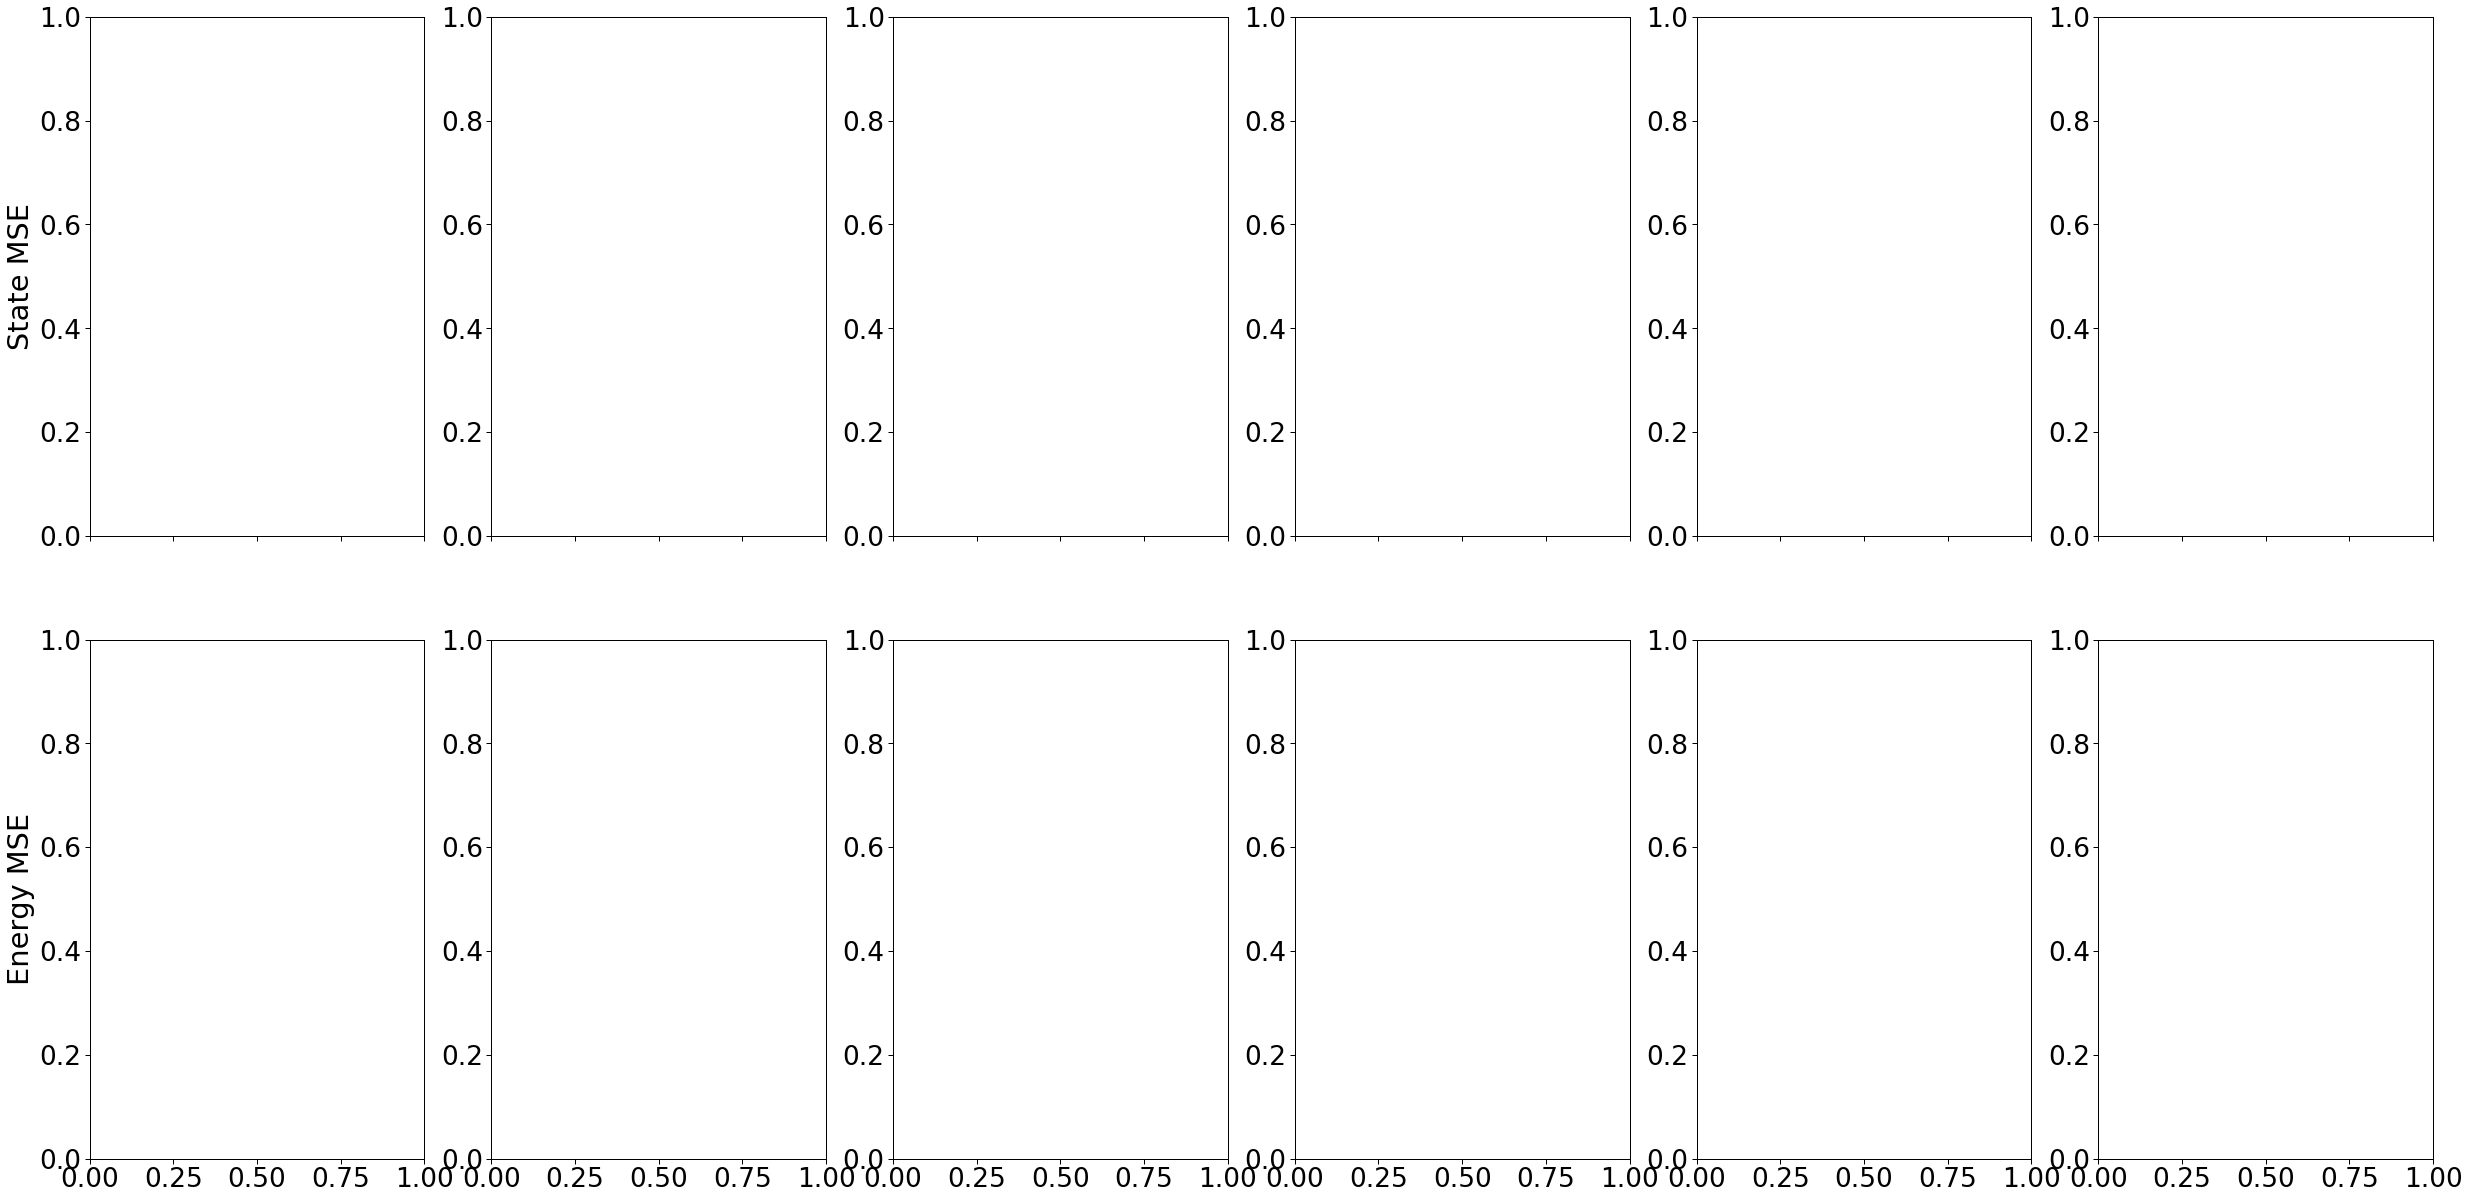

In [9]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=3, rc={'lines.linewidth':3})
sns.set_palette('deep')

# fig,ax = plt.subplots(1,2,figsize=(20,7))

# g = sns.barplot(x='Method',y='State Error',data=new_df,ax=ax[0])
# g.set_yscale('log')

# g = sns.barplot(x='Method',y='Energy Error',data=new_df,ax=ax[1])
# g.set_yscale('log')

# ax[1].set_ylabel('Average Energy MSE')
# ax[0].set_ylabel('Average State MSE')


noise_vec = [True]
datasets = ['mass_spring','pendulum','n_grav','three_body','n_spring']
root_dir = 'largest_expt/'
# root_dir = ''
label_list = ['DN','HNN','PNN','DGN','HOGN','VIGN']
labels = ['MASS SPRING','PENDULUM','2-BODY GRAVITATIONAL','3-BODY GRAVITATIONAL','5 SPRING PARTICLE']

fig,ax = plt.subplots(2,6,figsize=(7*6,7*3),sharex=True)
# fig.suptitle(labels[data_index])
ax[0,0].set_ylabel('State MSE')
ax[1,0].set_ylabel('Energy MSE')

for data_index,dataset_name in enumerate(datasets):
    for noisy in noise_vec:
        
        state_error1 = state_error[data_index]
        energy_error1 = energy_error[data_index]

        states_df = convert_to_df(state_error1)
        energy_df = convert_to_df(energy_error1)
        
        ax[0,data_index].set_title(labels[data_index])
        g = sns.barplot(x='Method',y='Error',hue='Integrator',estimator=gmean,data=states_df,ax=ax[0,data_index])
        g.set_yscale('log')
        g.set(xlabel=None)
        if data_index >0:
            g.set(ylabel=None)
            g.set(xlabel=None)
            g.legend([],[], frameon=False)
        else:
            g.set(ylabel='State Error')
            g.set(xlabel=None)
            g.legend([],[], frameon=False)
#         g.set_xticks(rotation=45)
        g = sns.barplot(x='Method',y='Error',hue='Integrator',estimator=gmean,data=energy_df,ax=ax[1,data_index])
        g.set_yscale('log')
        if data_index >0:
            g.set(ylabel=None)
            g.set(xlabel=None)
            g.legend([],[], frameon=False)
        else:
            g.set(ylabel='Energy Error')
            g.set(xlabel=None)
            g.legend([],[], frameon=False)
#         locs, labels = plt.xticks()
#         plt.setp(labels, rotation=45)
        
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('main_results_test_tmax.pdf',bbox_inches='tight')
#         plt.xticks(rotation=45)

#         ax[0,data_index].errorbar(xvals-0.23,np.mean(state_error[0,:,:],1),yerr=np.std(state_error[0,:,:],1),fmt='o',label='rk4',color='royalblue',alpha=1)
#         ax[0,data_index].errorbar(xvals+0.23,np.mean(state_error[1,:,:],1),yerr=np.std(state_error[1,:,:],1),fmt='o',label='vi4',color='darkorange',alpha=1)
#         ax[1,data_index].errorbar(xvals-0.23,np.mean(energy_error[0,:,:],1),yerr=np.std(energy_error[0,:,:],1),fmt='o',label='rk4',color='royalblue',alpha=1)
#         ax[1,data_index].errorbar(xvals+0.23,np.mean(energy_error[1,:,:],1),yerr=np.std(energy_error[1,:,:],1),fmt='o',label='vi4',color='darkorange',alpha=1)
#         ax[0,data_index].set_yscale('log',nonposy='clip')
#         ax[1,data_index].set_yscale('log',nonposy='clip')
#         ax[1].set_yscale('log',nonposy='clip')
#         ax[0].set_ylim([-10**9,0])
#         ax[1].set_ylim([-10**9,0])
        
#         ax[1,data_index].set_xticks(xvals)
#         ax[1,data_index].set_xticklabels(label_list)
#         plt.show()
#         plt.tight_layout()
#         plt.savefig(f'{dataset_name}_geom_tanh_{noisy}.pdf',bbox_inches='tight')